Final RMSE: 6.570408927598848


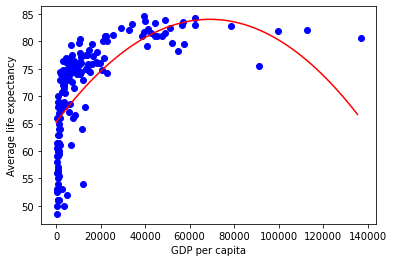

In [34]:
# Introduction: 

# The coefficients generated so far use a very specific range of values that we have defined.
# But if the data from the Nations file is normalized,
# it is possible to use the same range between -1 and +1 for all coefficients.


# Problem definition:

# First, normalize the input values of the Nation file.
# Then generate random coefficients for the polynomial functions in the value range between -1 and +1.
# Remember the polynomial which best approximates the data. Visualize it in a diagram,
# together with the gross domestic product per capita and life expectancy.
# To do so, it is necessary to denormalize the approximated values of the best polynomial.

# Import external libraries
import matplotlib.pyplot as plt
import math
import numpy as np
import random

# Enable inline plotting
%matplotlib inline

# Import the CSV file
nations = np.genfromtxt("nations.csv", delimiter=",", skip_header=True)

# Label graph plot
plt.xlabel("GDP per capita")
plt.ylabel("Average life expectancy")

# Calculate GDP per capita for each country
gdp = nations[:,3] * 1000000
gdppc = gdp

for i in range(len(gdp)):
    gdppc[i] = gdp[i] / nations[i, 6]

# Get life expectancy
lifeExpectancy = nations[:,4]

# Plot average life expectancy over GPD per capita
plt.plot(gdppc, lifeExpectancy, "ob")

# Store max values of gdppc and life expectancy for denormalization
gdppcMax = np.amax(gdppc)
lifeExpectancyMax = np.amax(lifeExpectancy)

# Normalize data in gdppc and life expectancy
gdppc = gdppc / gdppcMax
lifeExpectancy = lifeExpectancy / lifeExpectancyMax

# Approximate relation with polinomial
gdppcVector = np.expand_dims(gdppc, axis=0)
exponentsVector = np.expand_dims(np.arange(0,3), axis=1)
gdppcToThePowerOfExponentMatrix = np.power(gdppcVector, exponentsVector)

# Find polynomial with lowest rmse
smallestRMSE = 1000
bestCoefficients = []

# Try 10000 different random coefficients to find best ones
for j in range(10000):
    # Generate random coefficients
    coefficients = np.expand_dims(np.array([random.uniform(-1.0, 1.0),
                                            random.uniform(-1.0, 1.0),
                                            random.uniform(-1.0, 1.0)]),
                                  axis = 1)
    
    #Calculate approximated life expectancy values with 2nd order polynomial
    lifeExpectancyPolynomialApproximation = np.matmul(gdppcToThePowerOfExponentMatrix.transpose(), coefficients)
    lifeExpectancyPolynomialApproximation = np.squeeze(lifeExpectancyPolynomialApproximation)

    # Calculate and output RMSE value
    squareErrorSum = np.sum(np.power(lifeExpectancyMax * lifeExpectancyPolynomialApproximation - lifeExpectancyMax * lifeExpectancy, 2))

    mse = squareErrorSum / len(lifeExpectancy)

    rmse = math.sqrt(mse)
    
    # Check if current RMSE is the smallest
    if(rmse < smallestRMSE):
        smallestRMSE = rmse
        bestCoefficients = coefficients

# Print final RMSE value
print("Final RMSE: {}".format(smallestRMSE))

# Make bestCoefficients an array
bestCoefficients = np.squeeze(bestCoefficients)

# Return y value for polynomial with provided coefficients
def polynomialFunction(x, coefficients):
    y = 0
    
    for e in range(len(coefficients)):
        y = y + coefficients[e] * np.power(x, e)
    
    y = y
    return y

# Plotting the polynomial approximation
xValues = np.arange(0.0, 1.0, 0.01)
plt.plot(xValues * gdppcMax, polynomialFunction(xValues, bestCoefficients) * lifeExpectancyMax, color = "red")